In [1]:
# Example of how to use the CGMFtk package for the yields class

# Table of Contents
1. [Import Modules](#import)
2. [Read the Yield File](#yield)
3. [Summary Table (Yields)](#tableYields)
4. [Histogram Fission Fragment Properties (Yields)](#ffYields)

### 1. import modules for the notebook
<a id='import'></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from CGMFtk import yields as yld

In [3]:
# also define some plotting features
import matplotlib as mpl
mpl.rcParams['font.size'] = 12
mpl.rcParams['font.family'] = 'Helvetica','serif'
mpl.rcParams['font.weight'] = 'normal'
mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.
mpl.rcParams['xtick.major.pad'] = '10'
mpl.rcParams['ytick.major.pad'] = '10'
mpl.rcParams['image.cmap'] = 'BuPu'

In [4]:
# define a working directory where the history files are stored
workdir = './'
yieldFile = 'yields.cgmf' # example file with just the yields

### 2. Read CGMF Yield File
<a id='yield'></a>

In [5]:
yields = yld.Yields(workdir + yieldFile)

In [6]:
# print the number of events in the file
print ('This file contains ',str(yields.getNumberEvents()),' events and ',str(yields.getNumberFragments()),' fission fragments')

This file contains  500000  events and  1000000  fission fragments


A specific number of events can be loaded by specifying 'nevents' after the file name

hist = yld.Yields(workdir + yieldFile, nevents=500)

### 3. Summary Table (Yields)
<a id='tableYields'></a>

In [7]:
# print a summary table of the fragment properties
yields.summaryTable()

,All Fragments,Light Fragments,Heavy Fragments
A,118.00,96.87,139.13
Z,46.00,38.23,53.77
TXE / U (MeV),22.24,12.78,9.46
TKE / KE (MeV),172.21,101.39,70.82
J ($\hbar$),9.19,8.55,9.83
parity,-0.00,-0.00,0.00


### 4. Histogram Fission Fragment Properties (Yields)
<a id='ffYields'></a>

The yield file contains the mass, charge, spin, parity, excitation energy, kinetic energy, and momentum of each fission fragment (before neutron and gamma emission).  As with the CGMF history files, we can access the yield properties through 'get' commands, as illustrated below

In [8]:
# pull the yield results
A = yields.getA()
Z = yields.getZ()
TKE = yields.getTKE()
TXE = yields.getTXE()
spin = yields.getJ()
parity = yields.getP()

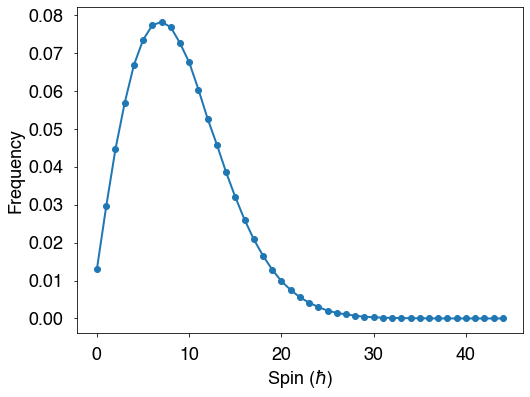

In [9]:
# plot the distribution of spins
fig = plt.figure(figsize=(8,6))
bins = np.arange(min(spin),max(spin))
h,b = np.histogram(spin,bins=bins,density=True)
plt.plot(b[:-1],h,'o-')
plt.xlabel(r'Spin ($\hbar$)')
plt.ylabel('Frequency')
plt.show()

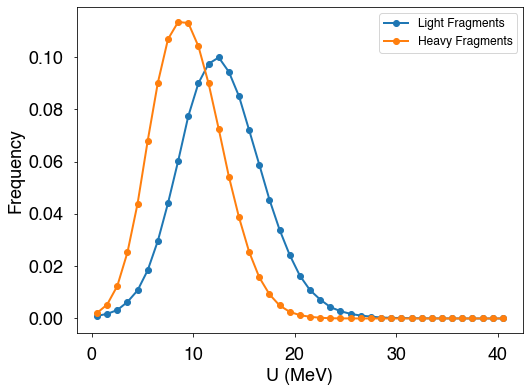

In [10]:
# compare the excitation energy of the light and heavy fragments
Ul = yields.getULF()
Uh = yields.getUHF()
Umin = np.min([np.min(Ul),np.min(Uh)])
Umax = np.max([np.max(Ul),np.max(Uh)])
fig = plt.figure(figsize=(8,6))
bins = np.arange(Umin,Umax)
h,b = np.histogram(Ul,bins=bins,density=True)
plt.plot(0.5*(b[:-1]+b[1:]),h,'o-',label='Light Fragments')
h,b = np.histogram(Uh,bins=bins,density=True)
plt.plot(0.5*(b[:-1]+b[1:]),h,'o-',label='Heavy Fragments')
plt.legend()
plt.xlabel('U (MeV)')
plt.ylabel('Frequency')
plt.show()